In [1]:
!pip3 install owlready2

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from owlready2 import *
import datetime

dul_onto = get_ontology("http://www.ease-crc.org/ont/DUL.owl").load()
dul = get_namespace("http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#")

onto = get_ontology("http://www.semanticweb.org/german_tourism_activities")
onto.imported_ontologies.append(dul_onto)

with onto:
    onto.metadata.comment.append("Authors: Giulio Billi, Cono Cirone")
    onto.metadata.comment.append("Domain: Activity recommendation and tourism in German cities.")
    onto.metadata.comment.append("German City Tourism Activities Ontology")

    class Activity(Thing):
        comment = ["A general concept for an activity of interest. Represents physical locations and events."]
        label = ["Activity"]
        is_a = [dul.Entity]

    class City(Thing):
        comment = ["A German city where an activity is located."]
        label = ["City"]
        is_a = [dul.PhysicalPlace]

    class BudgetTier(Thing):
        comment = ["A classification representing the cost of an Activity (Free, Low, Medium, High)."]
        label = ["Budget Tier"]
        is_a = [dul.Concept]

    class LocationSetting(Thing):
        comment = ["A classification describing the physical environment setting where an activity takes place. (Indoor vs. Outdoor)."]
        label = ["Location Setting"]
        is_a = [dul.Concept]

    class OperatingHours(Thing):
        comment = ["A time interval specification defining the opening and closing times for a physical venue."]
        label = ["Operating Hours"]
        is_a = [dul.TimeInterval]

    class DayOfWeek(Thing):
        comment = ["A temporal concept representing a specific day of the week (e.g., Monday, Tuesday)."]
        label = ["Day of Week"]
        is_a = [dul.Concept]
    
    class Duration(Thing):
        comment = ["A temporal quantity representing the length of a tour (e.g., 2 hours, 3.5 hours)."]
        label = ["Duration"]
        is_a = [dul.Amount]

    class Language(Thing):
        comment = ["A human language in which a tour is offered."]
        label = ["Language"]
        is_a = [dul.InformationObject]

    class MeetingPoint(Thing):
        comment = ["A physical location where a tour starts."]
        label = ["Meeting Point"]
        is_a = [dul.PhysicalPlace]

    class Tour(Activity):
        comment = ["An organized guided activity or experience conducted in a city, typically scheduled at specific times."]
        label = ["Tour"]
        is_a = [dul.Event]

    class PhysicalVenue(Activity):
        comment = ["A visitable physical location that tourists can access, characterized by defined operating hours."]
        label = ["Physical Venue"]
        is_a = [dul.PhysicalPlace]

    class Museum(PhysicalVenue):
        comment = ["A cultural institution that preserves and exhibits artifacts, artworks, or historical objects for public viewing."]
        label = ["Museum"]
    class Park(PhysicalVenue):
        comment = ["A public outdoor area featuring green spaces, gardens, or natural landscapes for recreation and leisure."]
        label = ["Park"]
    class NightlifeVenue(PhysicalVenue):
        comment = ["A venue offering entertainment, social activities, or refreshments primarily during evening and night hours."]
        label = ["Nightlife Venue"]
    class Sight(PhysicalVenue):
        comment = ["A notable location, building, or monument of cultural, historical, or architectural significance."]
        label = ["Sight"]
    
    class VenueType(Thing):
        comment = ["A general classification representing the category of a physical venue."]
        label = ["Venue Type"]
        is_a = [dul.Concept]

    class MuseumType(VenueType):
        comment = ["A classification representing the thematic category of a museum (e.g., Art, History, Science)."]
        label = ["Museum Type"]
        is_a = [dul.Concept]
    class ParkType(VenueType):
        comment = ["A classification representing the category of a park (e.g., Botanical Garden, Urban Park)."]
        label = ["Park Type"]
        is_a = [dul.Concept]
    class ClubType(VenueType):
        comment = ["A classification representing the category of a nightlife venue (e.g., Bar, Nightclub, Live Music Venue)."]
        label = ["Club Type"]
        is_a = [dul.Concept]
    class SightType(VenueType):
        comment = ["A classification representing the category of a sight (e.g., Monument, Landmark, Historic Building)."]
        label = ["Sight Type"]
        is_a = [dul.Concept]

    AllDisjoint([Activity, City, BudgetTier, LocationSetting, OperatingHours, 
                 DayOfWeek, Duration, Language, MeetingPoint])


    # =========================================================================
    # OBJECT PROPERTIES
    # =========================================================================
    
    # --- Attributes & Classifications ---
    class hasBudget(ObjectProperty, FunctionalProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [Activity]
        range = [BudgetTier]
        label = ["has budget"]
        comment = ["A relation connecting an activity to its cost classification."]

    class hasLocationSetting(ObjectProperty, FunctionalProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [Activity]
        range = [LocationSetting]
        label = ["has location setting"]
        comment = ["A relation connecting an activity to its location setting (Indoor vs. Outdoor)."]

    # --- Spatial & Temporal ---
    
    class isInCity(ObjectProperty, FunctionalProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [Activity]
        range = [City]
        label = ["is in city"]
        comment = ["A relation connecting an activity to the city it is in."]

    class hasMeetingPoint(ObjectProperty, FunctionalProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [Tour]
        range = [MeetingPoint]
        label = ["has meeting point"]
        comment = ["A relation connecting a tour to its starting location."]

    
    class hasDuration(ObjectProperty, FunctionalProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [Tour]
        range = [Duration]
        label = ["has duration"]
        comment = ["A relation connecting a tour to its temporal duration specification."]

    # --- Descriptive & Operational ---

    class hasOperatingHours(ObjectProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [PhysicalVenue]
        range = [OperatingHours]
        label = ["has operating hours"]
        comment = ["A relation connecting a physical venue to its set of operating hours."]

    class appliesToDay(ObjectProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [OperatingHours]
        range = [DayOfWeek]
        label = ["applies to day"]
        comment = ["A relation specifying which day of the week a particular operating hours schedule is valid for."]

    class hasLanguage(ObjectProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [Tour]
        range = [Language]
        label = ["has language"]
        comment = ["A relation connecting a tour to its language(s)."]

    # --- Specific Classification Properties ---
    # All these connect an Entity to a Concept (Type), so they are sub-properties of isClassifiedBy

    class hasVenueType(ObjectProperty, AsymmetricProperty, IrreflexiveProperty):
        domain = [PhysicalVenue]
        range = [VenueType]
        label = ["has venue type"]
        comment = ["A generic relation connecting a physical venue to its categories."]
    
    class hasMuseumType(hasVenueType):
        domain = [Museum]
        range = [MuseumType]
        label = ["has museum type"]
        comment = ["A relation connecting a museum to its category."]

    class hasParkType(hasVenueType):
        domain = [Park]
        range = [ParkType]
        label = ["has park type"]
        comment = ["A relation connecting a park to its category."]

    class hasClubType(hasVenueType):
        domain = [NightlifeVenue]
        range = [ClubType]
        label = ["has club type"]
        comment = ["A relation connecting a nightlife venue to its category."]

    class hasSightType(hasVenueType):
        domain = [Sight]
        range = [SightType]
        label = ["has sight type"]
        comment = ["A relation connecting a sight to its category."]

    # =========================================================================
    # DATA PROPERTIES
    # =========================================================================
    class opensAt(DataProperty, FunctionalProperty):
        domain = [OperatingHours]
        range = [datetime.time] 
        label = ["opens at"]
        comment = ["The time at which a venue opens for the specified operating hours period."]

    class closesAt(DataProperty, FunctionalProperty):
        domain = [OperatingHours]
        range = [datetime.time] 
        label = ["closes at"]
        comment = ["The time at which a venue closes for the specified operating hours period."]

# Save the ontology
onto.save(file="german_city_tourism_final_d2.owl", format="rdfxml")
print('Ontology created and saved')

Ontology created and saved


In [3]:
!pip3 install ontogram
!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 KB 850.4 kB/s eta 0:00:00 kB/s eta 0:00:01


In [4]:
from owlready2 import *
import subprocess

# Load your ontology from file
onto = get_ontology("german_city_tourism_final_d2.owl").load()

# 1) Save a dot file (class hierarchy graph)
onto.save(file="ontology_graph.dot", format="ntriples")  # we just need the data
# We'll let Graphviz create a visualization from a simple dot wrapper

# Create a simple dot wrapper for classes and subclass edges
def export_class_graph(ontology, dot_path="ontology_classes.dot"):
    with open(dot_path, "w") as f:
        f.write("digraph G {\n")
        for cls in ontology.classes():
            f.write(f'  "{cls.name}" [shape=box];\n')
            for parent in cls.is_a:
                if isinstance(parent, ThingClass):
                    f.write(f'  "{parent.name}" -> "{cls.name}";\n')
        f.write("}\n")

export_class_graph(onto, "ontology_classes.dot")

# 2) Use Graphviz to create a PNG
subprocess.run(["dot", "-Tpng", "ontology_classes.dot", "-o", "ontology_classes.png"], check=True)

print("Generated ontology_classes.png")

Generated ontology_classes.png


In [5]:
# Run the HermiT reasoner to check consistency and compute inferences
from owlready2 import sync_reasoner_hermit

# Sync the reasoner - this will raise an error if the ontology is inconsistent
try:
    with onto:
        sync_reasoner_hermit(infer_property_values=True, ignore_unsupported_datatypes=True)
    print("✅ Ontology is consistent!")
    print(f"Inferred facts have been added to the ontology.")
except OwlReadyInconsistentOntologyError:
    print("❌ Ontology is INCONSISTENT!")

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /home/os1r1s/.local/lib/python3.10/site-packages/owlready2/hermit:/home/os1r1s/.local/lib/python3.10/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmp739a1r25 -Y --ignoreUnsupportedDatatypes


✅ Ontology is consistent!
Inferred facts have been added to the ontology.


* Owlready2 * HermiT took 2.86716628074646 seconds
* Owlready * Equivalenting: owl.Thing DUL.Entity
* Owlready * Equivalenting: DUL.Entity owl.Thing
* Owlready * Reparenting german_tourism_activities.Duration: {owl.Thing, DUL.Amount} => {DUL.Amount}
* Owlready * Reparenting german_tourism_activities.Language: {owl.Thing, DUL.InformationObject} => {DUL.InformationObject}
* Owlready * Reparenting german_tourism_activities.City: {owl.Thing, DUL.PhysicalPlace} => {DUL.PhysicalPlace}
* Owlready * Reparenting german_tourism_activities.MeetingPoint: {owl.Thing, DUL.PhysicalPlace} => {DUL.PhysicalPlace}
* Owlready * Reparenting german_tourism_activities.VenueType: {owl.Thing, DUL.Concept} => {DUL.Concept}
* Owlready * Reparenting german_tourism_activities.BudgetTier: {owl.Thing, DUL.Concept} => {DUL.Concept}
* Owlready * Reparenting german_tourism_activities.LocationSetting: {owl.Thing, DUL.Concept} => {DUL.Concept}
* Owlready * Reparenting german_tourism_activities.DayOfWeek: {owl.Thing, DUL.

In [6]:
# List all classes and their inferred superclasses
print("=== Classes and their superclasses ===")
for cls in onto.classes():
    print(f"{cls.name}: {[s.name for s in cls.is_a if hasattr(s, 'name')]}")

# Check for any unsatisfiable classes (classes that cannot have instances)
print("\n=== Checking for unsatisfiable classes ===")
unsatisfiable = list(default_world.inconsistent_classes())
if unsatisfiable:
    print(f"❌ Unsatisfiable classes found: {unsatisfiable}")
else:
    print("✅ All classes are satisfiable")

=== Classes and their superclasses ===
Activity: ['Thing', 'Entity']
City: ['PhysicalPlace']
BudgetTier: ['Concept']
LocationSetting: ['Concept']
OperatingHours: ['TimeInterval']
DayOfWeek: ['Concept']
Duration: ['Amount']
Language: ['InformationObject']
MeetingPoint: ['PhysicalPlace']
Tour: ['Activity', 'Event']
PhysicalVenue: ['Activity', 'PhysicalPlace']
Museum: ['PhysicalVenue']
Park: ['PhysicalVenue']
NightlifeVenue: ['PhysicalVenue']
Sight: ['PhysicalVenue']
VenueType: ['Concept']
MuseumType: ['VenueType']
ParkType: ['VenueType']
ClubType: ['VenueType']
SightType: ['VenueType']

=== Checking for unsatisfiable classes ===
✅ All classes are satisfiable


In [7]:
# Show inferred class hierarchies (after reasoning)
print("=== Inferred Class Hierarchies ===")
for cls in onto.classes():
    # Get all superclasses (both asserted and inferred)
    all_supers = [s.name for s in cls.is_a if hasattr(s, 'name')]
    # Get only inferred superclasses
    inferred = [s.name for s in cls.INDIRECT_is_a if hasattr(s, 'name') and s not in cls.is_a]
    
    print(f"\n{cls.name}:")
    print(f"  Direct (asserted + inferred): {all_supers}")
    if inferred:
        print(f"  Inferred ancestors: {inferred}")

# Show inferred equivalent classes
print("\n=== Inferred Equivalent Classes ===")
for cls in onto.classes():
    if cls.equivalent_to:
        print(f"{cls.name} ≡ {[e.name for e in cls.equivalent_to if hasattr(e, 'name')]}")

# Show inferred property characteristics
print("\n=== Object Property Inferences ===")
for prop in onto.object_properties():
    print(f"\n{prop.name}:")
    print(f"  Domain: {[d.name for d in prop.domain if hasattr(d, 'name')]}")
    print(f"  Range: {[r.name for r in prop.range if hasattr(r, 'name')]}")
    if hasattr(prop, 'is_a'):
        supers = [s.name for s in prop.is_a if hasattr(s, 'name')]
        if supers:
            print(f"  SubPropertyOf: {supers}")

# Check for any unsatisfiable classes
print("\n=== Checking for unsatisfiable classes ===")
unsatisfiable = list(default_world.inconsistent_classes())
if unsatisfiable:
    print(f"❌ Unsatisfiable classes found: {unsatisfiable}")
else:
    print("✅ All classes are satisfiable")

=== Inferred Class Hierarchies ===

Activity:
  Direct (asserted + inferred): ['Thing', 'Entity']
  Inferred ancestors: ['Activity']

City:
  Direct (asserted + inferred): ['PhysicalPlace']
  Inferred ancestors: ['Thing', 'Entity', 'PhysicalObject', 'City', 'Object']

BudgetTier:
  Direct (asserted + inferred): ['Concept']
  Inferred ancestors: ['Thing', 'BudgetTier', 'SocialObject', 'Entity', 'Object']

LocationSetting:
  Direct (asserted + inferred): ['Concept']
  Inferred ancestors: ['Thing', 'LocationSetting', 'SocialObject', 'Entity', 'Object']

OperatingHours:
  Direct (asserted + inferred): ['TimeInterval']
  Inferred ancestors: ['Thing', 'OperatingHours', 'Entity', 'Region', 'Abstract']

DayOfWeek:
  Direct (asserted + inferred): ['Concept']
  Inferred ancestors: ['Thing', 'SocialObject', 'Entity', 'DayOfWeek', 'Object']

Duration:
  Direct (asserted + inferred): ['Amount']
  Inferred ancestors: ['Duration', 'Thing', 'Abstract', 'Entity', 'Region']

Language:
  Direct (asserted

Graph with inferences saved to german_tourism_inferred.png


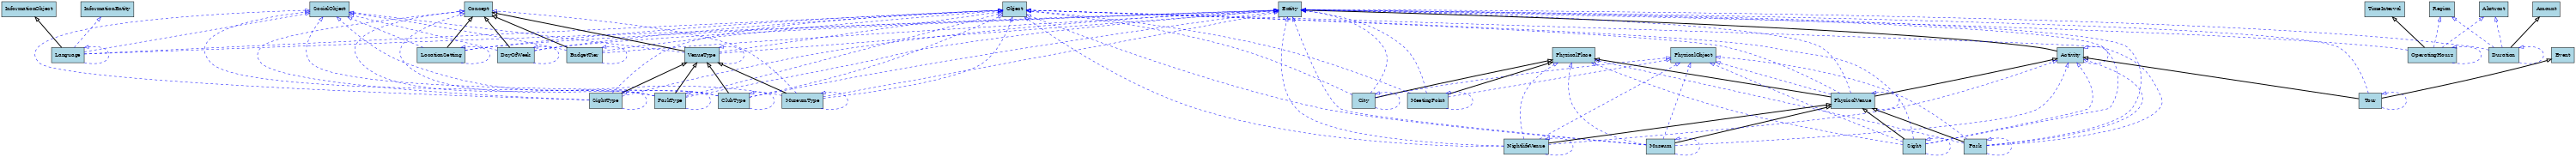

In [8]:
from graphviz import Digraph
from IPython.display import display, Image

def visualize_with_inferences(ontology, filename="ontology_inferred"):
    dot = Digraph(comment='Ontology with Inferences')
    dot.attr(rankdir='BT', size='20,20', dpi='150', nodesep='0.8', ranksep='1.0')
    
    # Style for nodes
    dot.attr('node', shape='box', style='filled', fillcolor='lightblue', fontsize='12')
    
    for cls in ontology.classes():
        dot.node(cls.name, cls.name)
        
        for parent in cls.is_a:
            if hasattr(parent, 'name') and parent.name != 'Thing':
                # Asserted edges: solid black
                dot.edge(cls.name, parent.name, color='black', arrowhead='empty', penwidth='2')
        
        # Inferred ancestors (indirect) - dashed blue
        for ancestor in cls.INDIRECT_is_a:
            if hasattr(ancestor, 'name') and ancestor not in cls.is_a and ancestor.name != 'Thing':
                dot.edge(cls.name, ancestor.name, color='blue', style='dashed', arrowhead='empty')
    
    dot.render(filename, format='png', cleanup=True)
    return filename + '.png'

img_path = visualize_with_inferences(onto, "german_tourism_inferred")
print(f"Graph with inferences saved to {img_path}")
display(Image(filename=img_path, width=1200))